In [34]:
#Short code to figure out the best number of clusters for a distribution of images in a directory.
#Also has code to convert images in to vector + how to do it for multiple images in a directory
#Assuming all images are processed and are of same dimensions

import sklearn
from sklearn.cluster import KMeans
import numpy as np

In [54]:
import numpy as np
from PIL import Image
from sklearn.cluster import KMeans

img = Image.open('bird_small.png').convert('RGBA')
arr = np.array(img)

# record the original shape
shape = arr.shape

# make a 1-dimensional view of arr
flat_arr = arr.ravel()

# convert it to a matrix
vector = np.matrix(flat_arr)

#Just as an example
X = np.concatenate([vector,1*vector,1.5*vector,0.5*vector,0.7*vector,0.8*vector,0.9*vector,0.65*vector,0.76*vector,0.54*vector,0.43*vector,0.49*vector])

In [55]:
#Use this if you have a directory of images

#from skimage.io import imread_collection

#your path 
#col_dir = 'Training/*.jpg'
#col = imread_collection(col_dir)
#x_train = np.array(col)
#X = [arr.ravel() for arr in x_train]



In [56]:
def kmeanscost(K):
    kmeans = KMeans(n_clusters=K, random_state=0).fit(X)
    c=0
    m=X.shape[0]
    for i in range(0,m):
        c = c+(X[i,:]-kmeans.cluster_centers_[kmeans.labels_[i]])*((X[i,:]-kmeans.cluster_centers_[kmeans.labels_[i]]).T)
    cost = (1/float(m))*c 
    return float(cost)



In [57]:
import matplotlib.pyplot as plt

In [70]:
max_clusters=8
costs = []
for i in range(1,max_clusters+1):
    costs.append(kmeanscost(i))

In [71]:
costs

[165142035.11812416,
 58399946.05363754,
 16978771.312634505,
 4302884.748463881,
 2474193.286138884,
 1368408.577249996,
 572243.5868499975,
 348322.1832999984]

In [72]:
cluster_nums = range(1,max_clusters+1)

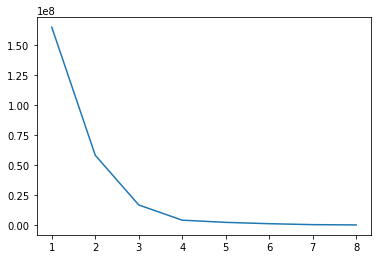

In [73]:
plt.plot(cluster_nums,costs)